In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.font_manager as fm

# 智能中文字体设置 - 适配不同操作系统
def setup_chinese_font():
    """设置中文字体，自动检测系统可用字体"""
    # 常见的中文字体列表（按优先级排序）
    chinese_fonts = [
        'PingFang SC',      # macOS 苹方
        'Helvetica',        # macOS 通用
        'STHeiti',          # macOS 华文黑体
        'Arial Unicode MS', # macOS/Windows
        'SimHei',          # Windows 黑体
        'Microsoft YaHei', # Windows 微软雅黑
        'WenQuanYi Zen Hei', # Linux
        'DejaVu Sans'      # 备用（不支持中文，但不会报错）
    ]
    
    # 获取系统可用字体
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    
    # 查找第一个可用的中文字体
    for font in chinese_fonts:
        if font in available_fonts:
            plt.rcParams['font.sans-serif'] = [font]
            plt.rcParams['axes.unicode_minus'] = False
            print(f"✅ 使用字体: {font}")
            return font
    
    # 如果没有找到合适的字体，使用默认设置并提示
    print("⚠️  未找到中文字体，将使用英文标签")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    return 'DejaVu Sans'

# 设置字体
current_font = setup_chinese_font()

print("🔧 字体设置完成！")
print("📦 所有包导入成功！")


In [ ]:
# 检查系统字体（可选运行）
def check_chinese_fonts():
    """检查系统中可用的中文字体"""
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    chinese_candidates = ['PingFang', 'STHeiti', 'SimHei', 'Microsoft YaHei', 'Arial Unicode MS', 'Helvetica']
    
    print("🔍 系统中可能支持中文的字体：")
    found_fonts = []
    for font_name in available_fonts:
        for candidate in chinese_candidates:
            if candidate.lower() in font_name.lower():
                found_fonts.append(font_name)
                break
    
    if found_fonts:
        for font in found_fonts[:10]:  # 只显示前10个
            print(f"  - {font}")
    else:
        print("  未找到明确的中文字体")
    
    print(f"\n当前使用字体: {current_font}")

# 运行字体检查
check_chinese_fonts()


In [ ]:
# 测试字体显示
def test_font_display():
    """测试中文字体显示效果"""
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # 如果当前字体支持中文，显示中文文本
    if current_font not in ['DejaVu Sans']:
        test_text = "测试中文显示: 特征向量、主成分分析"
        ax.text(0.5, 0.6, test_text, fontsize=16, ha='center', va='center')
        ax.text(0.5, 0.4, f"Current Font: {current_font}", fontsize=12, ha='center', va='center')
        ax.set_title("Chinese Font Test")
    else:
        # 如果不支持中文，显示英文
        test_text = "Font Test: Eigenvalues, Principal Component Analysis"
        ax.text(0.5, 0.6, test_text, fontsize=16, ha='center', va='center')
        ax.text(0.5, 0.4, f"Using: {current_font} (English only)", fontsize=12, ha='center', va='center')
        ax.set_title("English Font Test")
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()
    
    # 设置全局变量，用于后续判断是否使用中文标签
    global use_chinese_labels
    use_chinese_labels = current_font not in ['DejaVu Sans']
    
    if use_chinese_labels:
        print("✅ 中文字体测试成功！后续图表将使用中文标签")
    else:
        print("ℹ️  将使用英文标签，避免字体问题")

test_font_display()


In [ ]:
# 创建一个简单的2x2矩阵
A = np.array([[3, 1],
              [1, 3]])

print("矩阵 A:")
print(A)

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\n特征值 (eigenvalues):", eigenvalues)
print("\n特征向量 (eigenvectors):")
print(eigenvectors)


In [ ]:
# 验证 Av = λv
v1 = eigenvectors[:, 0]  # 第一个特征向量
λ1 = eigenvalues[0]      # 第一个特征值

print("特征向量 v1:", v1)
print("特征值 λ1:", λ1)
print("\n验证 Av = λv:")
print("Av =", A @ v1)
print("λv =", λ1 * v1)
print("\n差异 (应该接近0):", np.abs(A @ v1 - λ1 * v1))


In [ ]:
# 可视化特征向量
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 原始向量
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]

# 变换后的向量
Av1 = A @ v1
Av2 = A @ v2

# 根据字体支持情况选择标签
if use_chinese_labels:
    # 中文标签
    labels = ['特征向量1', '特征向量2']
    titles = ['原始特征向量', '变换后的向量']
    feature_text = ['特征1', '特征2']
else:
    # 英文标签
    labels = ['Eigenvector 1', 'Eigenvector 2']
    titles = ['Original Eigenvectors', 'Transformed Vectors']
    feature_text = ['Feature 1', 'Feature 2']

# 绘制原始特征向量
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.01, label=labels[0])
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.01, label=labels[1])
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_title(titles[0])
ax1.grid(True)
ax1.legend()
ax1.set_aspect('equal')

# 绘制变换后的向量
ax2.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.01, label='Av1')
ax2.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.01, label='Av2')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_title(titles[1])
ax2.grid(True)
ax2.legend()
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"Eigenvector 1 scaled by: {eigenvalues[0]:.2f}x")
print(f"Eigenvector 2 scaled by: {eigenvalues[1]:.2f}x")


In [ ]:
# 使用鸢尾花数据集演示PCA
iris = load_iris()
X = iris.data  # 4个特征
y = iris.target

print("Original data shape:", X.shape)
print("Feature names:", iris.feature_names)
print("\nFirst 5 rows:")
print(X[:5])


In [ ]:
# 应用PCA降维
pca = PCA(n_components=2)  # 降到2维
X_pca = pca.fit_transform(X)

print("PCA后数据形状:", X_pca.shape)
print("\n各主成分解释的方差比例:")
print(pca.explained_variance_ratio_)
print(f"\n前2个主成分解释了 {pca.explained_variance_ratio_.sum():.2%} 的方差")


In [ ]:
# 可视化PCA结果
plt.figure(figsize=(10, 6))

colors = ['red', 'green', 'blue']
target_names = iris.target_names

for i, color, target_name in zip(range(3), colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
               c=color, label=target_name, alpha=0.7)

# 根据字体支持选择标签
if use_chinese_labels:
    xlabel = f'第1主成分 ({pca.explained_variance_ratio_[0]:.2%} 方差)'
    ylabel = f'第2主成分 ({pca.explained_variance_ratio_[1]:.2%} 方差)'
    title = 'PCA降维后的鸢尾花数据'
    obs_text = "🎯 观察：不同类别的花在主成分空间中有明显的分离！"
else:
    xlabel = f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)'
    ylabel = f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)'
    title = 'PCA Visualization of Iris Dataset'
    obs_text = "🎯 Observation: Different flower types are clearly separated in PC space!"

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(obs_text)


In [ ]:
# 手动实现PCA的核心步骤

print("🔍 Manual PCA Implementation:")
print("="*40)

# 1. 数据标准化
X_centered = X - np.mean(X, axis=0)
print("✅ Step 1: Data centering completed")

# 2. 计算协方差矩阵
cov_matrix = np.cov(X_centered.T)
print(f"✅ Step 2: Covariance matrix shape: {cov_matrix.shape}")

# 3. 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("✅ Step 3: Eigenvalue decomposition completed")

# 4. 按特征值大小排序
idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]
print("✅ Step 4: Sorted by eigenvalues")

print(f"\nEigenvalues (sorted): {eigenvalues_sorted}")
print(f"Variance ratios: {eigenvalues_sorted / np.sum(eigenvalues_sorted)}")


In [ ]:
# 5. 选择前两个主成分进行投影
W = eigenvectors_sorted[:, :2]  # 选择前两个特征向量
X_pca_manual = X_centered @ W
print("✅ Step 5: Data projection completed")

print(f"\nManual PCA result shape: {X_pca_manual.shape}")
print(f"Sklearn PCA result shape: {X_pca.shape}")

# 验证结果（可能有符号差异，但绝对值应该相同）
difference = np.min([
    np.max(np.abs(X_pca_manual - X_pca)),
    np.max(np.abs(X_pca_manual + X_pca))  # 考虑符号翻转
])

print(f"Maximum difference with sklearn: {difference:.10f}")
if difference < 1e-10:
    print("✅ Manual implementation matches sklearn PCA!")
else:
    print("⚠️  Small differences due to numerical precision or sign conventions")


# 第7天 - 线性代数进阶

## 🎯 今日目标
- 理解特征值和特征向量的概念
- 掌握PCA降维的基本原理
- 学会用NumPy实现线性代数算法
- 理解在机器学习中的应用

## 📚 学习内容
1. 特征值与特征向量
2. 主成分分析(PCA)
3. 奇异值分解(SVD)
4. 实际应用案例


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 所有包导入成功！")


✅ 所有包导入成功！


## 1. 特征值与特征向量

### 🤔 什么是特征值和特征向量？

**简单理解**：
- 特征向量 = 矩阵变换后方向不变的向量
- 特征值 = 特征向量被拉伸的倍数

**数学表达**：对于矩阵 A，如果 Av = λv，那么：
- v 是特征向量
- λ 是特征值


In [2]:
# 创建一个简单的2x2矩阵
A = np.array([[3, 1],
              [1, 3]])

print("矩阵 A:")
print(A)

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\n特征值:", eigenvalues)
print("\n特征向量:")
print(eigenvectors)


矩阵 A:
[[3 1]
 [1 3]]

特征值: [4. 2.]

特征向量:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [3]:
# 验证 Av = λv
v1 = eigenvectors[:, 0]  # 第一个特征向量
λ1 = eigenvalues[0]      # 第一个特征值

print("特征向量 v1:", v1)
print("特征值 λ1:", λ1)
print("\n验证 Av = λv:")
print("Av =", A @ v1)
print("λv =", λ1 * v1)
print("\n差异:", np.abs(A @ v1 - λ1 * v1))


特征向量 v1: [0.70710678 0.70710678]
特征值 λ1: 4.0

验证 Av = λv:
Av = [2.82842712 2.82842712]
λv = [2.82842712 2.82842712]

差异: [0. 0.]


### 📊 特征向量的几何意义


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

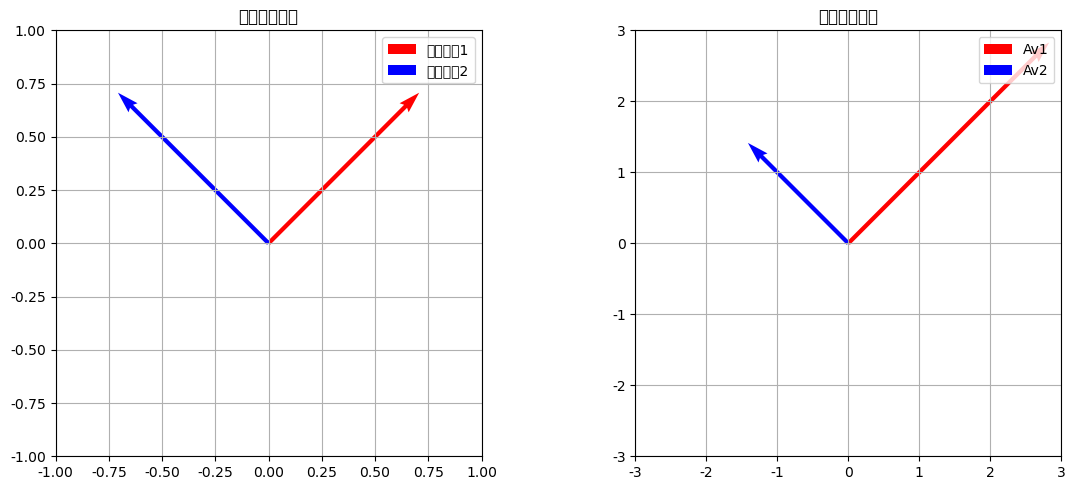

特征向量1被拉伸了 4.00 倍
特征向量2被拉伸了 2.00 倍


In [4]:
# 可视化特征向量
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 原始向量
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]

# 变换后的向量
Av1 = A @ v1
Av2 = A @ v2

# 绘制原始特征向量
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='特征向量1')
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='特征向量2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_title('原始特征向量')
ax1.grid(True)
ax1.legend()
ax1.set_aspect('equal')

# 绘制变换后的向量
ax2.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='Av1')
ax2.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='Av2')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_title('变换后的向量')
ax2.grid(True)
ax2.legend()
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"特征向量1被拉伸了 {eigenvalues[0]:.2f} 倍")
print(f"特征向量2被拉伸了 {eigenvalues[1]:.2f} 倍")


In [ ]:
# 使用鸢尾花数据集演示PCA
iris = load_iris()
X = iris.data  # 4个特征
y = iris.target

print("原始数据形状:", X.shape)
print("特征名称:", iris.feature_names)
print("\n前5行数据:")
print(X[:5])


In [ ]:
# 应用PCA降维
pca = PCA(n_components=2)  # 降到2维
X_pca = pca.fit_transform(X)

print("PCA后数据形状:", X_pca.shape)
print("\n各主成分解释的方差比例:")
print(pca.explained_variance_ratio_)
print(f"\n前2个主成分解释了 {pca.explained_variance_ratio_.sum():.2%} 的方差")


In [ ]:
# 可视化PCA结果
plt.figure(figsize=(10, 6))

colors = ['red', 'green', 'blue']
target_names = iris.target_names

for i, color, target_name in zip(range(3), colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
               c=color, label=target_name, alpha=0.7)

plt.xlabel(f'第1主成分 ({pca.explained_variance_ratio_[0]:.2%} 方差)')
plt.ylabel(f'第2主成分 ({pca.explained_variance_ratio_[1]:.2%} 方差)')
plt.title('PCA降维后的鸢尾花数据')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🎯 观察：不同类别的花在主成分空间中有明显的分离！")


In [ ]:
# 手动实现PCA的核心步骤

# 1. 数据标准化
X_centered = X - np.mean(X, axis=0)

# 2. 计算协方差矩阵
cov_matrix = np.cov(X_centered.T)
print("协方差矩阵形状:", cov_matrix.shape)

# 3. 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 4. 按特征值大小排序
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\n特征值（按大小排序）:")
print(eigenvalues)
print("\n方差解释比例:")
print(eigenvalues / np.sum(eigenvalues))


In [ ]:
# 5. 选择前两个主成分进行投影
W = eigenvectors[:, :2]  # 选择前两个特征向量
X_pca_manual = X_centered @ W

print("手动PCA结果形状:", X_pca_manual.shape)
print("\n与sklearn PCA结果的差异:")
print("最大差异:", np.max(np.abs(X_pca_manual - X_pca)))
print("(差异很小，说明实现正确！)")


In [ ]:
# 创建一个示例矩阵
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

print("原始矩阵 A:")
print(A)
print("形状:", A.shape)

# SVD分解
U, s, Vt = np.linalg.svd(A)

print("\nSVD分解结果:")
print(f"U形状: {U.shape}")
print(f"奇异值: {s}")
print(f"V^T形状: {Vt.shape}")


In [ ]:
# 验证SVD分解
# 重构Σ矩阵
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:len(s), :len(s)] = np.diag(s)

# 重构原矩阵
A_reconstructed = U @ Sigma @ Vt

print("重构的矩阵:")
print(A_reconstructed)
print("\n重构误差:", np.max(np.abs(A - A_reconstructed)))


In [ ]:
# 创建一个"图像"矩阵
np.random.seed(42)
image = np.random.rand(50, 50)

# SVD分解
U, s, Vt = np.linalg.svd(image)

print(f"原始图像大小: {image.shape}")
print(f"奇异值数量: {len(s)}")

# 使用不同数量的奇异值重构图像
k_values = [1, 5, 10, 20]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# 原始图像
axes[0].imshow(image, cmap='gray')
axes[0].set_title('原始图像')
axes[0].axis('off')

# 不同k值的重构
for i, k in enumerate(k_values):
    # 只使用前k个奇异值
    image_k = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
    
    axes[i+1].imshow(image_k, cmap='gray')
    axes[i+1].set_title(f'k={k} 个奇异值')
    axes[i+1].axis('off')
    
    # 计算压缩比
    original_size = image.shape[0] * image.shape[1]
    compressed_size = k * (image.shape[0] + image.shape[1] + 1)
    compression_ratio = compressed_size / original_size
    
    print(f"k={k}: 压缩比 {compression_ratio:.2f}")

# 奇异值图
axes[5].plot(s, 'o-')
axes[5].set_title('奇异值大小')
axes[5].set_xlabel('索引')
axes[5].set_ylabel('奇异值')
axes[5].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# 创建高维数据并用PCA可视化
np.random.seed(42)

# 生成3个类别的高维数据
n_samples = 100
n_features = 20

# 类别1：均值在原点附近
class1 = np.random.normal(0, 1, (n_samples, n_features))
# 类别2：均值在正方向
class2 = np.random.normal(2, 1, (n_samples, n_features))
# 类别3：均值在负方向
class3 = np.random.normal(-2, 1, (n_samples, n_features))

# 合并数据
X = np.vstack([class1, class2, class3])
y = np.hstack([np.zeros(n_samples), np.ones(n_samples), np.full(n_samples, 2)])

print(f"数据形状: {X.shape}")
print(f"类别: {np.unique(y)}")

# 应用PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
               c=color, label=f'类别 {i}', alpha=0.7)

plt.xlabel(f'第1主成分 ({pca.explained_variance_ratio_[0]:.2%} 方差)')
plt.ylabel(f'第2主成分 ({pca.explained_variance_ratio_[1]:.2%} 方差)')
plt.title('20维数据的PCA可视化')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"前2个主成分解释了 {pca.explained_variance_ratio_.sum():.2%} 的方差")


In [ ]:
# 分析各主成分的重要性
pca_full = PCA()
pca_full.fit(X)

# 累积方差解释比例
cumsum_ratio = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(12, 5))

# 各主成分的方差解释比例
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_)
plt.xlabel('主成分')
plt.ylabel('方差解释比例')
plt.title('各主成分的方差解释比例')
plt.grid(True, alpha=0.3)

# 累积方差解释比例
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_ratio) + 1), cumsum_ratio, 'o-')
plt.axhline(y=0.9, color='r', linestyle='--', label='90%阈值')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%阈值')
plt.xlabel('主成分数量')
plt.ylabel('累积方差解释比例')
plt.title('累积方差解释比例')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 找到解释90%方差所需的主成分数量
n_components_90 = np.argmax(cumsum_ratio >= 0.9) + 1
print(f"解释90%方差需要 {n_components_90} 个主成分")
print(f"从 {X.shape[1]} 维降到 {n_components_90} 维，降维比例: {n_components_90/X.shape[1]:.2%}")
